In [2]:
import sqlite3
import pandas as pd

sql = "SELECT name FROM sqlite_master where type = 'table'"
sql2 = "SELECT * FROM NBA_season1718_salary where season17_18 > 10000000"


con = sqlite3.connect("nba_salary.sqlite")
df = pd.read_sql_query(sql,con)

In [3]:
df

,name
0,NBA_season1718_salary
1,Seasons_Stats


In [6]:
import sqlalchemy as db
import pandas as pd

engine = db.create_engine('sqlite:///nba_salary.sqlite')
connection = engine.connect()

stats = pd.read_sql_query("SELECT * FROM seasons_stats",connection)
salary = pd.read_sql_query("SELECT * FROM NBA_season1718_salary",connection)

print(stats)

            X1    Year             Player  Pos   Age   Tm     G   GS      MP  \
0          0.0  1950.0    Curly Armstrong  G-F  31.0  FTW  63.0  NaN     NaN   
1          1.0  1950.0       Cliff Barker   SG  29.0  INO  49.0  NaN     NaN   
2          2.0  1950.0      Leo Barnhorst   SF  25.0  CHS  67.0  NaN     NaN   
3          3.0  1950.0         Ed Bartels    F  24.0  TOT  15.0  NaN     NaN   
4          4.0  1950.0         Ed Bartels    F  24.0  DNN  13.0  NaN     NaN   
...        ...     ...                ...  ...   ...  ...   ...  ...     ...   
24686  24686.0  2017.0        Cody Zeller   PF  24.0  CHO  62.0  NaN  1725.0   
24687  24687.0  2017.0       Tyler Zeller    C  27.0  BOS  51.0  NaN   525.0   
24688  24688.0  2017.0  Stephen Zimmerman    C  20.0  ORL  19.0  0.0   108.0   
24689  24689.0  2017.0        Paul Zipser   SF  22.0  CHI  44.0  NaN   843.0   
24690  24690.0  2017.0        Ivica Zubac    C  19.0  LAL  38.0  NaN   609.0   

        PER  ...    FT%  ORB  DRB    TR

In [8]:
millo = salary[salary['season17_18'] > 10000000]
print(millo)

        X1            Player   Tm  season17_18
0      1.0     Stephen Curry  GSW   34682550.0
1      2.0      LeBron James  CLE   33285709.0
2      3.0      Paul Millsap  DEN   31269231.0
3      4.0    Gordon Hayward  BOS   29727900.0
4      5.0     Blake Griffin  DET   29512900.0
..     ...               ...  ...          ...
117  118.0   Mirza Teletovic  MIL   10500000.0
118  119.0  Bojan Bogdanovic  IND   10500000.0
119  120.0         Jon Leuer  DET   10497319.0
120  121.0     Iman Shumpert  SAC   10337079.0
121  122.0  Maurice Harkless  POR   10162922.0

[122 rows x 4 columns]


In [12]:
df = pd.merge(millo,stats, on = 'Player')
print(df)

       X1_x            Player Tm_x  season17_18     X1_y    Year Pos   Age  \
0       1.0     Stephen Curry  GSW   34682550.0  20042.0  2010.0  PG  21.0   
1       1.0     Stephen Curry  GSW   34682550.0  20654.0  2011.0  PG  22.0   
2       1.0     Stephen Curry  GSW   34682550.0  21236.0  2012.0  PG  23.0   
3       1.0     Stephen Curry  GSW   34682550.0  21798.0  2013.0  PG  24.0   
4       1.0     Stephen Curry  GSW   34682550.0  22402.0  2014.0  PG  25.0   
...     ...               ...  ...          ...      ...     ...  ..   ...   
1013  122.0  Maurice Harkless  POR   10162922.0  21887.0  2013.0  SF  19.0   
1014  122.0  Maurice Harkless  POR   10162922.0  22505.0  2014.0  SF  20.0   
1015  122.0  Maurice Harkless  POR   10162922.0  23115.0  2015.0  SF  21.0   
1016  122.0  Maurice Harkless  POR   10162922.0  23723.0  2016.0  SF  22.0   
1017  122.0  Maurice Harkless  POR   10162922.0  24307.0  2017.0  SF  23.0   

     Tm_y     G  ...    FT%  ORB  DRB    TRB    AST  STL  BLK  

In [14]:
df2 = pd.merge(millo,stats, on = ['Player','Tm'])
print(df2)

<AxesSubplot:>

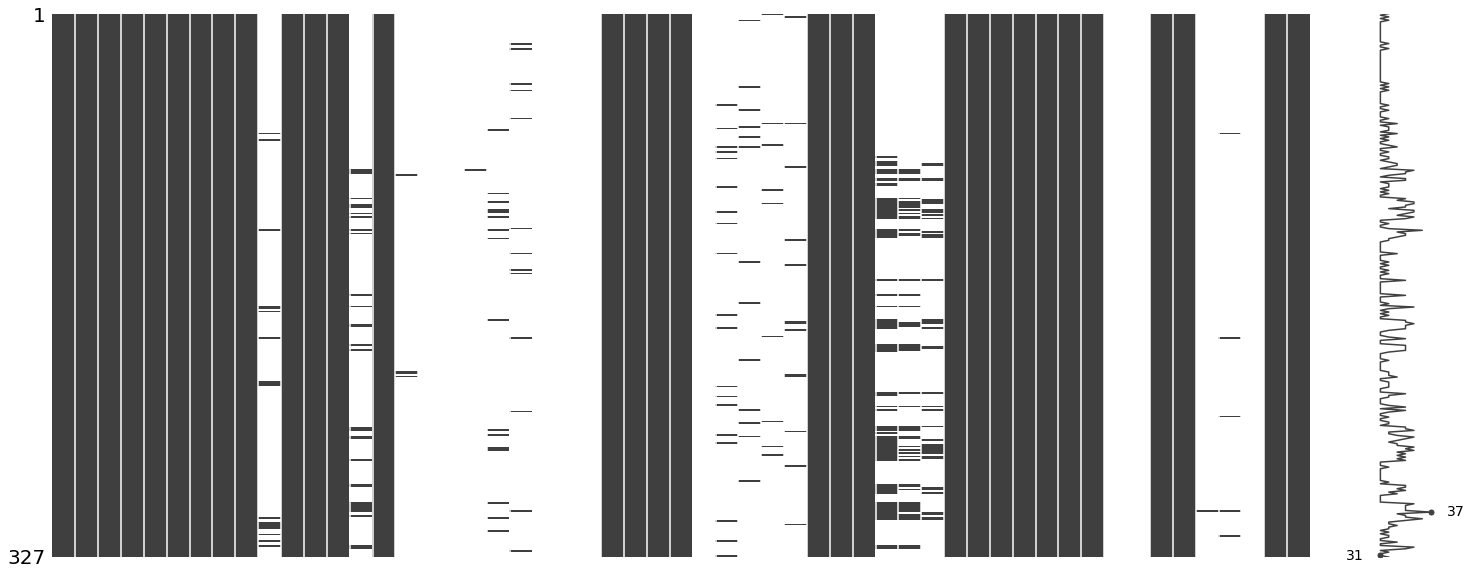

In [25]:
import missingno as msno
msno.matrix(df2)

In [19]:
df2.isnull()

ValueError: zero-size array to reduction operation minimum which has no identity

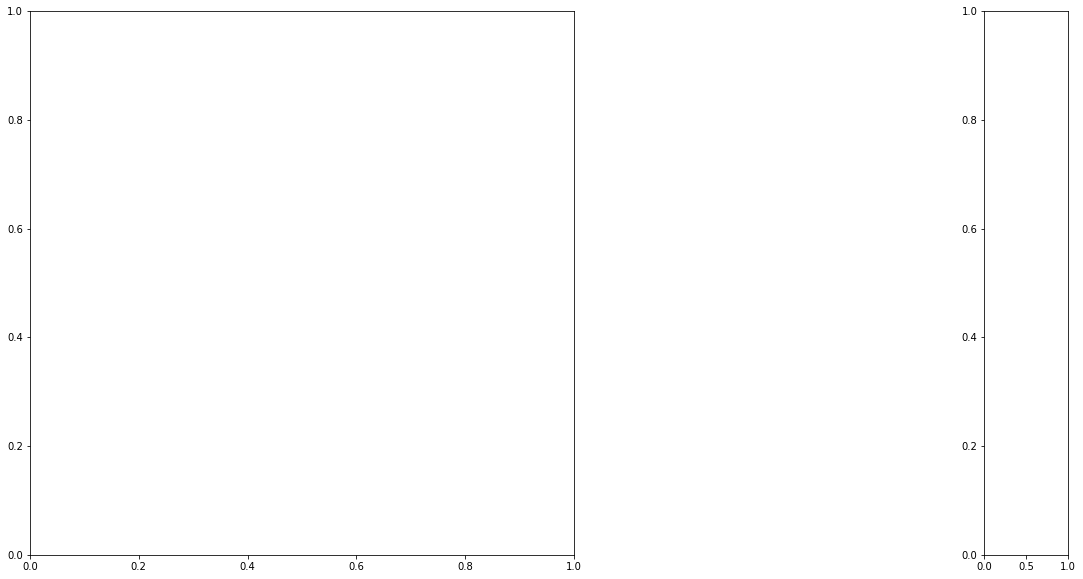

In [26]:
droped = df2.dropna()
msno.matrix(droped)

In [23]:
filled = df2.fillna(0)

<AxesSubplot:>

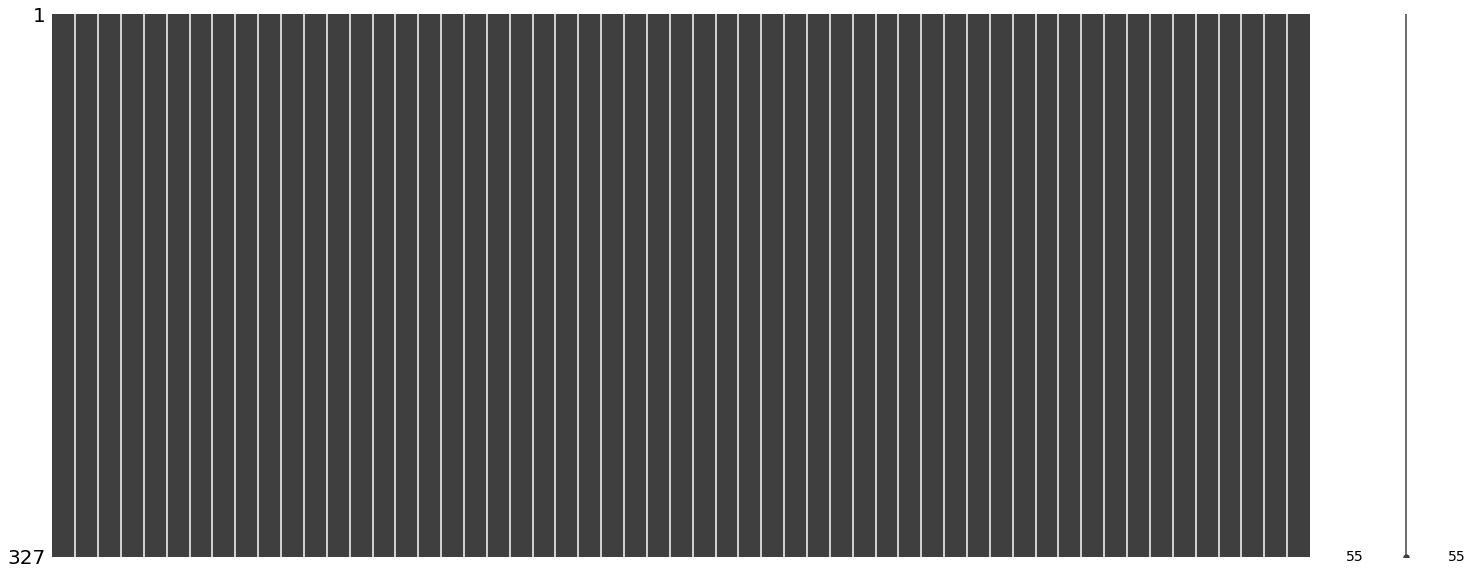

In [27]:
msno.matrix(filled)